In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



#enable horizantal scrolling
pd.set_option('display.width', None) 
pd.set_option('display.max_columns', None)

data = pd.read_csv(r"./data/housing.csv")
data.head(10)
        

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [173]:
# checking to see if we have any null values
data.info()
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity  

In [174]:
# #droping the null values and storing it on a new data frame
data_clean = data.dropna()
print(data_clean.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [175]:
# removing the median_house_value and set the x
# by setting axis=1, you're telling pandas to look for 'median_house_value' among the column labels and remove that entire column from the DataFrame.
x = data_clean.drop(['median_house_value'], axis=1)
y = data_clean['median_house_value']
# now we gonna select the test data so we can then evaluate our model
#notice we spliting the ther test data size to be 20% aka 0.2
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.2)

In [176]:
training_data = x_training.join(y_training)   
training_data.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18910,-122.26,38.13,28.0,3072.0,790.0,1375.0,705.0,1.6368,NEAR BAY,91200.0
8850,-118.41,34.09,37.0,2716.0,302.0,809.0,291.0,15.0001,<1H OCEAN,500001.0
444,-122.28,37.87,49.0,2026.0,548.0,963.0,521.0,1.9805,NEAR BAY,173700.0
6488,-118.01,34.09,29.0,3402.0,747.0,2331.0,690.0,3.6094,INLAND,179200.0
14021,-117.17,32.75,28.0,1514.0,384.0,540.0,352.0,2.1532,NEAR OCEAN,240000.0
19541,-120.94,37.63,43.0,244.0,52.0,176.0,60.0,1.4250,INLAND,69400.0
14656,-117.14,32.79,35.0,3578.0,582.0,1568.0,553.0,4.7813,NEAR OCEAN,188600.0
16400,-121.23,37.99,38.0,523.0,80.0,226.0,72.0,5.5693,INLAND,153100.0
13360,-117.64,34.02,6.0,248.0,47.0,119.0,42.0,2.1250,INLAND,416700.0
14594,-117.18,32.83,31.0,1772.0,353.0,1090.0,350.0,3.9265,NEAR OCEAN,162000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

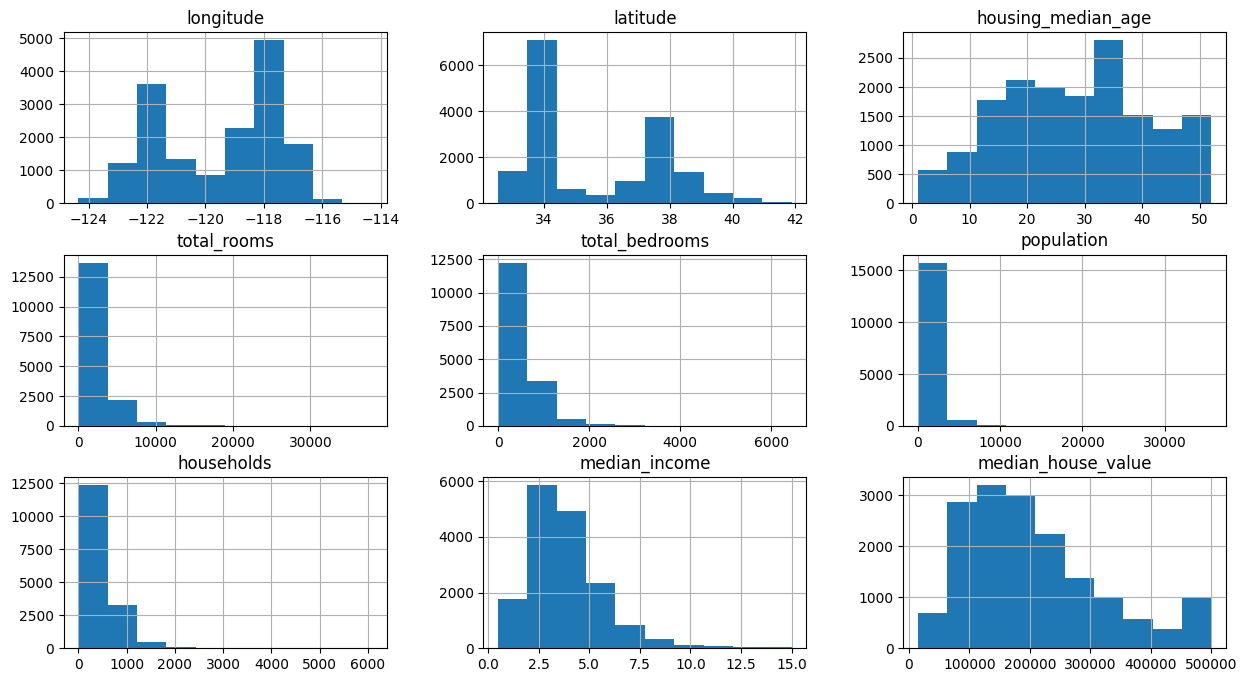

In [177]:
training_data.hist(figsize=(15,8))

In [178]:
#correlation 
#Each cell shows the correlation coefficient between the feature in that row and the feature in that column.
#Correlation values range from -1 to 1:
# 1 indicates a perfect positive correlation.
# -1 indicates a perfect negative correlation.
# 0 indicates no linear correlation.

training_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925091,-0.110221,0.044859,0.067559,0.099416,0.054719,-0.013118,-0.044298
latitude,-0.925091,1.000000,0.012552,-0.036217,-0.064996,-0.107603,-0.069533,-0.082123,-0.145315
housing_median_age,-0.110221,0.012552,1.000000,-0.362615,-0.323226,-0.297788,-0.305272,-0.114405,0.110664
total_rooms,0.044859,-0.036217,-0.362615,1.000000,0.931003,0.860394,0.920429,0.199869,0.130218
total_bedrooms,0.067559,-0.064996,-0.323226,0.931003,1.000000,0.879524,0.980275,-0.003504,0.047722
population,0.099416,-0.107603,-0.297788,0.860394,0.879524,1.000000,0.908026,0.007063,-0.028831
households,0.054719,-0.069533,-0.305272,0.920429,0.980275,0.908026,1.000000,0.017013,0.061887
median_income,-0.013118,-0.082123,-0.114405,0.199869,-0.003504,0.007063,0.017013,1.000000,0.688930
median_house_value,-0.044298,-0.145315,0.110664,0.130218,0.047722,-0.028831,0.061887,0.688930,1.000000


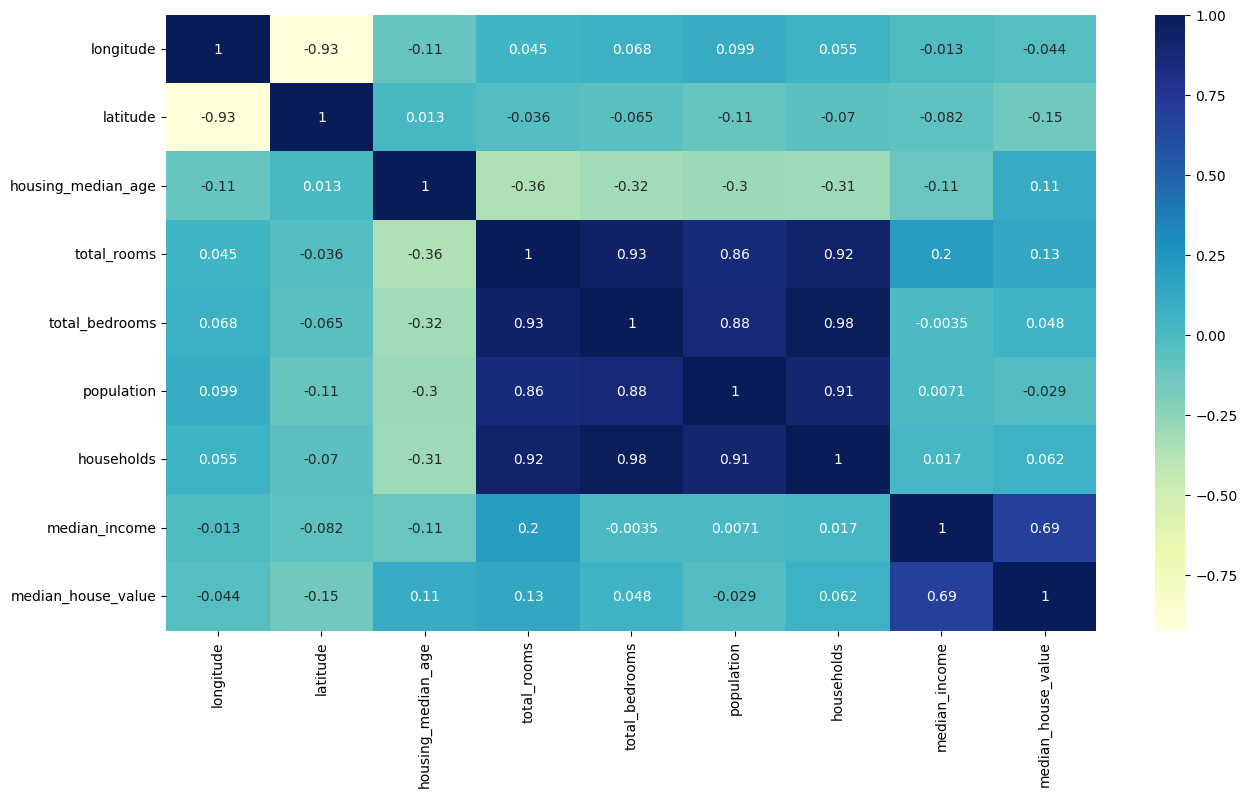

In [179]:
plt.figure(figsize=(15, 8))
#YlGnBu yellow, green and blue 
sns.heatmap(training_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

In [180]:
'''
np.log() applies the natural logarithm (base e) transformation to the values in each column.
-Why this is done:
Handle skewed data → Many real-world features (like rooms, population, households) have right-skewed distributions with a long tail (a few very large values). Taking the log compresses large values and makes the distribution more normal-like.
Reduce the impact of outliers → Extremely large values won’t dominate the model after log-scaling.
Stabilize variance → Makes relationships between variables more linear, which helps linear regression and other algorithms.
Numerical stability → Adding +1 ensures we don’t try to compute log(0), which is undefined.
'''
training_data['total_rooms']=np.log(training_data['total_rooms']+1)
training_data['total_bedrooms']=np.log(training_data['total_bedrooms']+1)
training_data['population']=np.log(training_data['population']+1)
training_data['households']=np.log(training_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

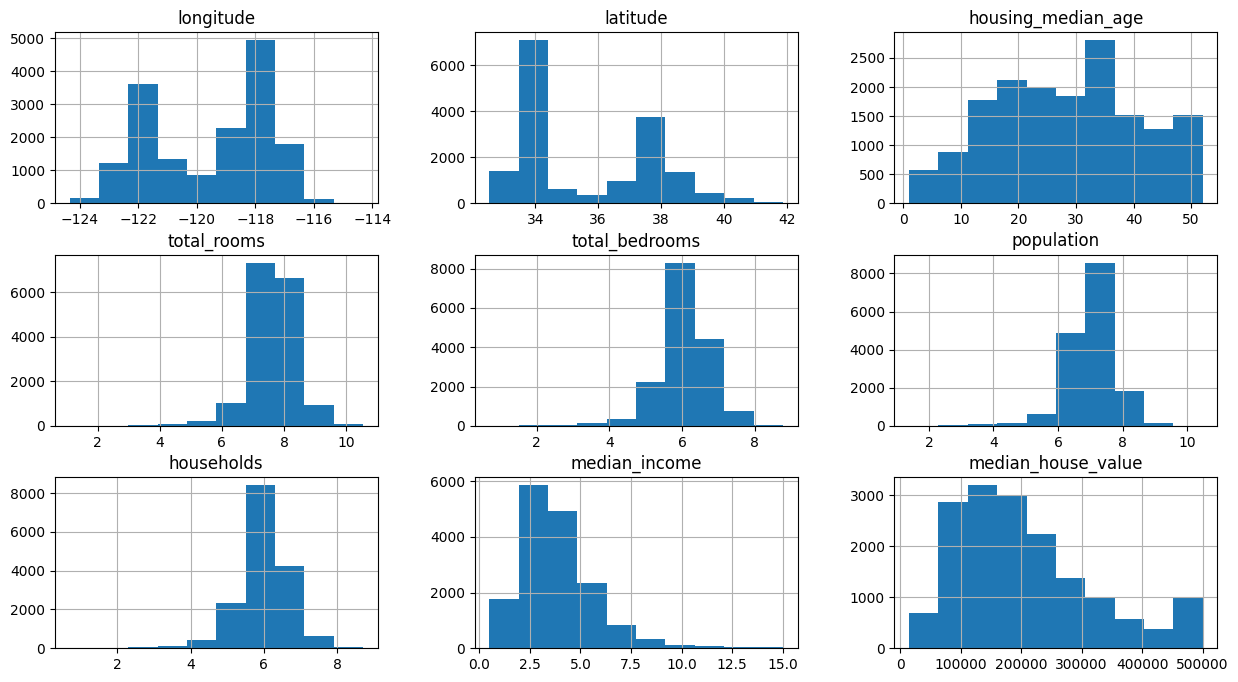

In [181]:
training_data.hist(figsize=(15,8))

In [182]:
training_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7270
INLAND        5188
NEAR OCEAN    2082
NEAR BAY      1802
ISLAND           4
Name: count, dtype: int64

In [183]:
# Create dummy variables for ocean_proximity
training_data['ocean_proximity']

18910      NEAR BAY
8850      <1H OCEAN
444        NEAR BAY
6488         INLAND
14021    NEAR OCEAN
            ...    
12476        INLAND
359        NEAR BAY
6440         INLAND
16465        INLAND
15854      NEAR BAY
Name: ocean_proximity, Length: 16346, dtype: object

In [184]:
# Create dummy variables for ocean_proximity 
# problem we have string instead of number, soltion we need to encode it using get_dummies
#notice For each unique category, it creates a new binary column in the DataFrame (1H OCEAN	INLAND	ISLAND	NEAR BAY	NEAR OCEAN)
dummies = pd.get_dummies(training_data.ocean_proximity).astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18910,0,0,0,1,0
8850,1,0,0,0,0
444,0,0,0,1,0
6488,0,1,0,0,0
14021,0,0,0,0,1
...,...,...,...,...,...
12476,0,1,0,0,0
359,0,0,0,1,0
6440,0,1,0,0,0
16465,0,1,0,0,0


In [185]:
#next step since we encoded the values now we need to drop the ocean_proximity and join the encoded data to our training data
training_data=training_data.join(dummies).drop(['ocean_proximity'], axis=1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18910,-122.26,38.13,28.0,8.030410,6.673298,7.226936,6.559615,1.6368,91200.0,0,0,0,1,0
8850,-118.41,34.09,37.0,7.907284,5.713733,6.697034,5.676754,15.0001,500001.0,1,0,0,0,0
444,-122.28,37.87,49.0,7.614312,6.308098,6.871091,6.257668,1.9805,173700.0,0,0,0,1,0
6488,-118.01,34.09,29.0,8.132413,6.617403,7.754482,6.538140,3.6094,179200.0,0,1,0,0,0
14021,-117.17,32.75,28.0,7.323171,5.953243,6.293419,5.866468,2.1532,240000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476,-121.48,38.58,48.0,7.797702,6.613384,7.156177,6.496775,1.6277,140600.0,0,1,0,0,0
359,-122.14,37.76,34.0,7.322510,5.446737,6.302619,5.356586,5.5701,252800.0,0,0,0,1,0
6440,-118.03,34.10,38.0,7.741534,6.033086,6.984716,5.988961,4.4236,233600.0,0,1,0,0,0
16465,-121.28,38.10,13.0,7.796880,6.375025,7.273786,6.408529,2.5556,133100.0,0,1,0,0,0


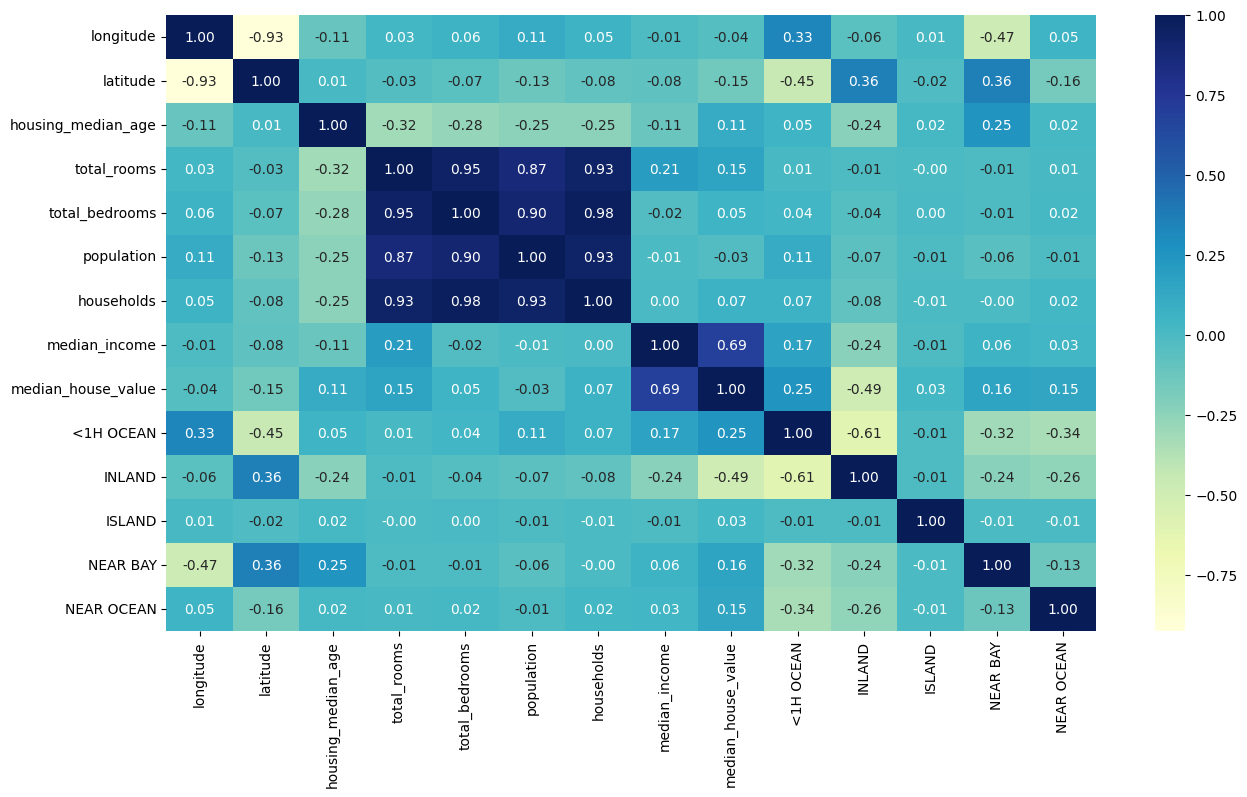

In [186]:
plt.figure(figsize=(15, 8))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

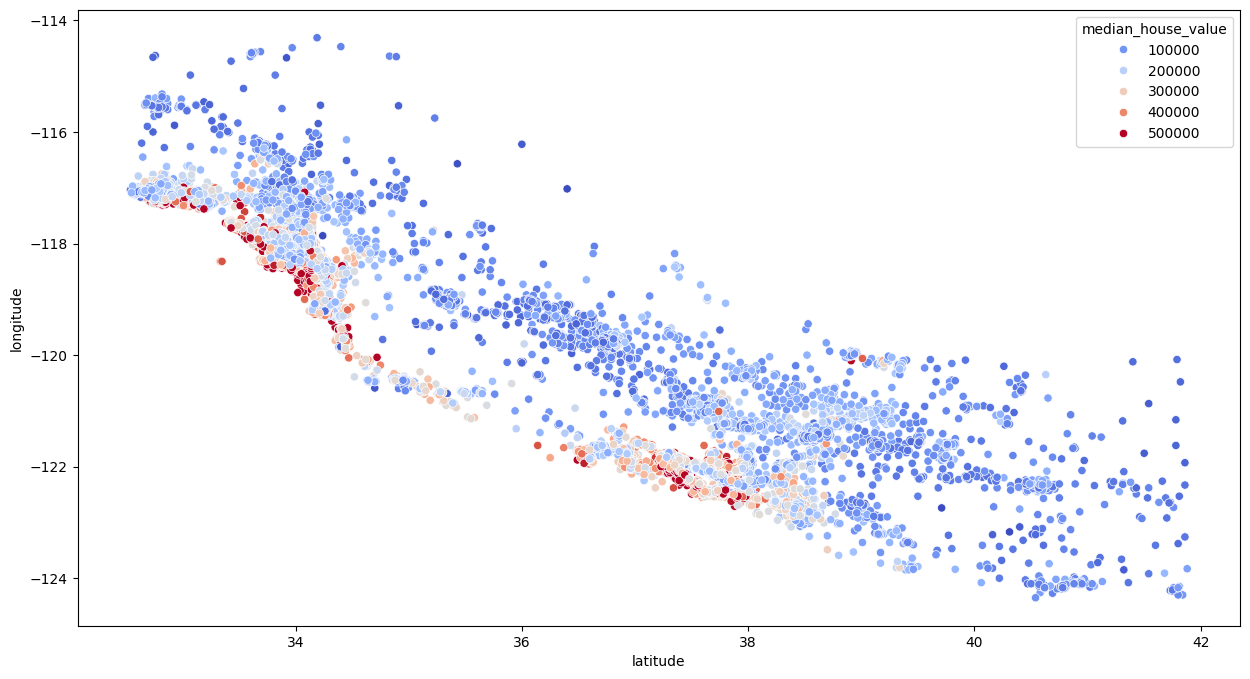

In [187]:
plt.figure(figsize=(15, 8))
#cool warm
sns.scatterplot(x="latitude", y="longitude", data=training_data, hue="median_house_value", palette="coolwarm")
plt.show()

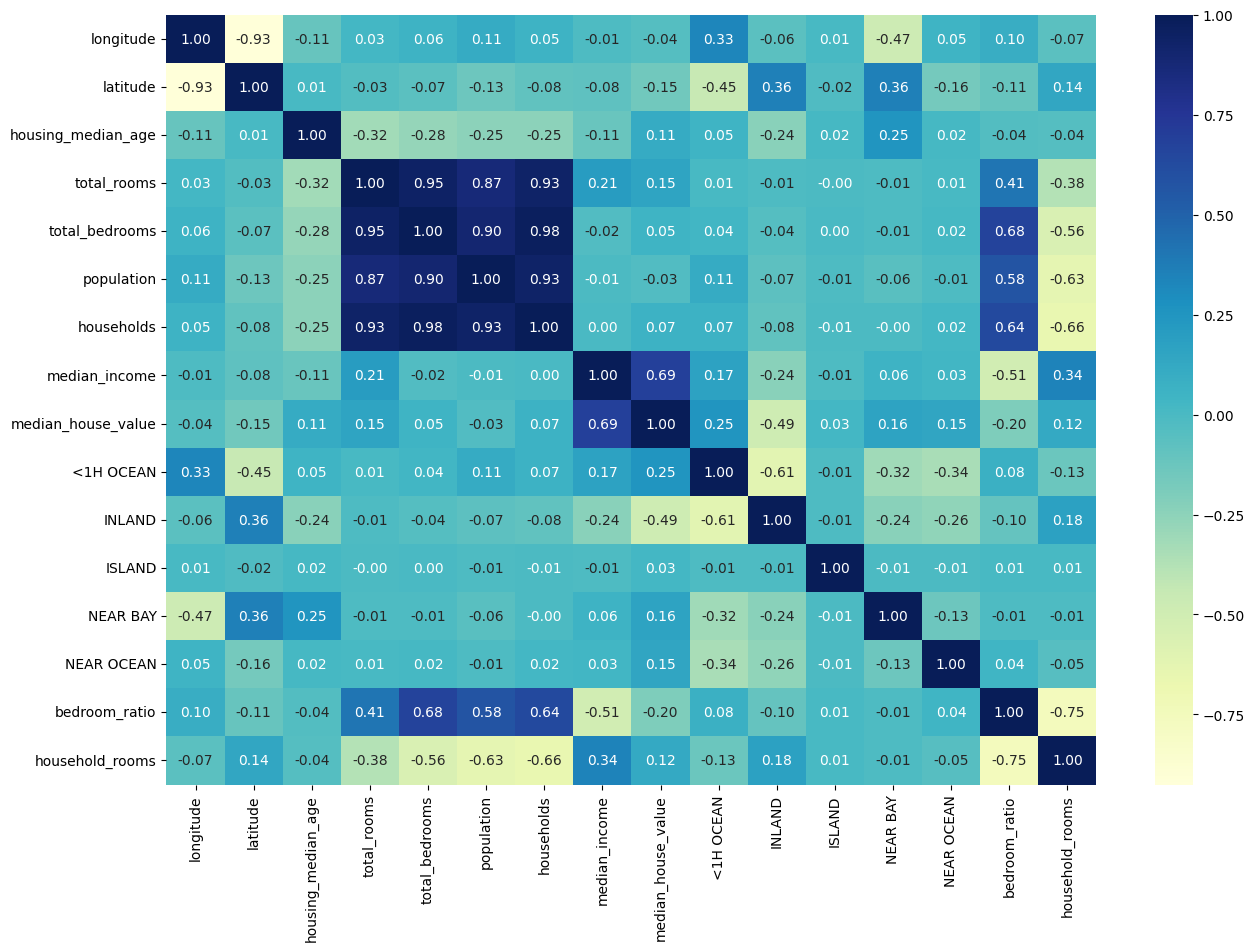

In [188]:
#The idea is that while "total rooms" and "total bedrooms" are individual features, their ratio might better indicate the type or functionality of #properties within a block (e.g., more bedrooms per room might suggest smaller, more compact living spaces or a different kind of dwelling).
#The video suggests that "total rooms" alone doesn't give the full picture if a block has many households . This new feature helps understand if the rooms # # are spread out among many small households or concentrated in fewer, larger ones, which could influence house values.

training_data['bedroom_ratio'] = training_data['total_bedrooms'] / training_data['total_rooms']
training_data['household_rooms'] = training_data['total_rooms'] / training_data['households']
plt.figure(figsize=(15, 10))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [189]:

x_training,y_training = training_data.drop(["median_house_value"], axis=1), training_data["median_house_value"]

model = LinearRegression()
model.fit(x_training, y_training)

test_data = x_test.join(y_test)
# since applied these changes to our training now we have to make the same changes to our test data set
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(["median_house_value"], axis=1),test_data["median_house_value"] 
#R-squared/ coefficient of determination, value, 0.0 to 1.0: R-squared ranges from 0 to 1
model.score(x_test, y_test)

0.6610683911639226